In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import google
import pandas as pd
from bq_helper import BigQueryHelper
from google.cloud import bigquery

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
query = """
    SELECT
       extract(DAYOFYEAR from date_local) as day_of_year,
       aqi
    FROM
       `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       city_name = "Los Angeles"
       AND state_name = "California"
       AND sample_duration = "24 HOUR"
       AND poc = 1
       AND EXTRACT(YEAR FROM date_local) = 2015
    ORDER BY day_of_year
        """

In [3]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

Using Kaggle's public dataset BigQuery integration.


In [4]:
df = bq_assistant.query_to_pandas(query)

<Axes: title={'center': 'PM 2.5 Fri-Mon Daily Air Quality Index'}, xlabel='day_of_year'>

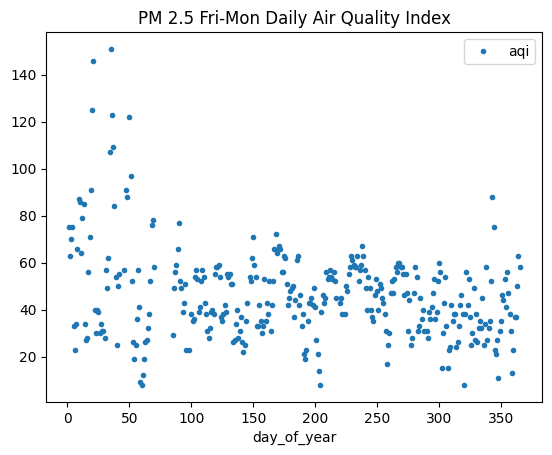

In [5]:
df.plot(x='day_of_year', y='aqi', style=".", title="PM 2.5 Fri-Mon Daily Air Quality Index")